# 0.0. Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn                                                          as sns
import matplotlib.pyplot                                                as plt

from IPython.core.display           import HTML
from IPython.display                import Image
import warnings
warnings.filterwarnings('ignore')

## 0.1. Helper Functions

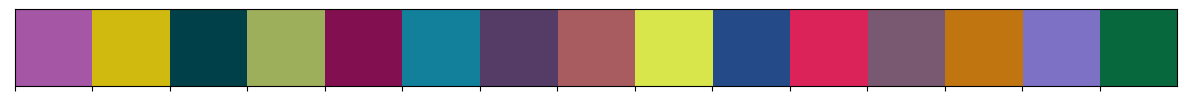

In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('_classic_test_patch')
    plt.rcParams['figure.figsize'] = [22,12]
    plt.rcParams['font.size'] = 20
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['xtick.labelsize'] = 13
    plt.rcParams['ytick.labelsize'] = 13
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12
    
    display(HTML ('<style>.container {width: 80% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
        
    palette = ["#A556A5", "#d1ba10", "#004049", "#9daf5b", "#821051", "#12809b",
             "#543C66", "#A85C60", "#d8e54b", "#244b87", "#DB235A", "#785971", 
             "#c17511", "#7c71c4", "#08683D"]    
    
    colors = sns.color_palette(palette=palette)
    sns.set_palette(colors)
    sns.palplot(palette)
    
jupyter_settings()

def colunas (df, column_df, doq_column, date_column):
    df[[doq_column, date_column]] = df[column_df].str.split(', ', 1, expand=True) 
    df[date_column] = pd.to_datetime(df[date_column])
    df[date_column] = df[date_column].dt.strftime('%d-%m-%Y')
    return df

def rename_columns(df):
    def snakecase(x):
        return x.replace(" ", "_").lower()

    cols_new = [snakecase(col) for col in df.columns]
    df.columns = cols_new
    return df

def column_date(df, column_date):
    df[column_date] = pd.to_datetime(df[column_date]).dt.strftime('%d-%m-%Y')
    return df

def column_month_year (df, column_date):
    df[column_date] = pd.to_datetime(df[column_date])
    df[column_date] = df[column_date].dt.strftime('%m-%Y')
    return df
    

## 0.2. Loading Data

In [3]:
fact_order_lines =  pd.read_csv("../dataset/fact_order_lines.csv")
dim_customers = pd.read_csv("../dataset/dim_customers.csv")
dim_date =  pd.read_csv("../dataset/dim_date.csv")
dim_products =  pd.read_csv("../dataset/dim_products.csv")
dim_targets_orders =  pd.read_csv("../dataset/dim_targets_orders.csv")

# 1.0. Data Description

## 1.1. Transform Columns

### 1.1.1. DataFrame fact_order_lines: dividir colunas, converter colunas texto para formato datetime, formatar a data no novo formato e renomear colunas

In [4]:
df_fact_order_lines = fact_order_lines.copy()
df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1


In [5]:
# order_placement_date
df_fact_order_lines = colunas(df_fact_order_lines, 'order_placement_date', 'dow_placement', 'placement_date')

# agreed_delivery_date
df_fact_order_lines = colunas(df_fact_order_lines, 'agreed_delivery_date', 'dow_agreed', 'agreed_date')

# actual_delivery_date
df_fact_order_lines = colunas(df_fact_order_lines, 'actual_delivery_date', 'dow_actual_delivery', 'delivery_date')

df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,dow_placement,placement_date,dow_agreed,agreed_date,dow_actual_delivery,delivery_date
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1,Tuesday,01-03-2022,Friday,04-03-2022,Friday,04-03-2022
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1,Tuesday,01-03-2022,Wednesday,02-03-2022,Wednesday,02-03-2022


In [6]:
df_fact_order_lines = rename_columns(df_fact_order_lines)
df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,in_full,on_time,on_time_in_full,dow_placement,placement_date,dow_agreed,agreed_date,dow_actual_delivery,delivery_date
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1,Tuesday,01-03-2022,Friday,04-03-2022,Friday,04-03-2022
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1,Tuesday,01-03-2022,Wednesday,02-03-2022,Wednesday,02-03-2022


### 1.1.2. DataFrame dim_date: renomear colunas, converter colunas texto para formato datetime e formatar a data no novo formato

In [7]:
df_dim_date = dim_date.copy()
df_dim_date.rename(columns={'date': 'placement_date','mmm_yy': 'monthly_year', 'week_no': 'week_month'}, inplace=True)

df_dim_date = column_month_year(df_dim_date, 'monthly_year')
df_dim_date = column_date (df_dim_date, 'placement_date')

df_dim_date.head(1)

,placement_date,monthly_year,week_month
0,01-04-2022,04-2022,W 14


## 1.2. Merge Available Dataset

In [8]:
col_fol = df_fact_order_lines.columns
col_dc = dim_customers.columns
col_dd = df_dim_date.columns
col_dp = dim_products.columns
col_dto = dim_targets_orders.columns

print("Colunas do dataframe fact_order_lines:", col_fol)
print("Colunas do dataframe dim_customers:", col_dc)
print("Colunas do dataframe dim_date:", col_dd)
print("Colunas do dataframe dim_products:", col_dp)
print("Colunas do dataframe dim_targets_orders:", col_dto)

Colunas do dataframe fact_order_lines: Index(['order_id', 'order_placement_date', 'customer_id', 'product_id',
       'order_qty', 'agreed_delivery_date', 'actual_delivery_date',
       'delivery_qty', 'in_full', 'on_time', 'on_time_in_full',
       'dow_placement', 'placement_date', 'dow_agreed', 'agreed_date',
       'dow_actual_delivery', 'delivery_date'],
      dtype='object')
Colunas do dataframe dim_customers: Index(['customer_id', 'customer_name', 'city'], dtype='object')
Colunas do dataframe dim_date: Index(['placement_date', 'monthly_year', 'week_month'], dtype='object')
Colunas do dataframe dim_products: Index(['product_name', 'product_id', 'category'], dtype='object')
Colunas do dataframe dim_targets_orders: Index(['customer_id', 'ontime_target%', 'infull_target%', 'otif_target%'], dtype='object')


In [9]:
merged_df = pd.merge(df_fact_order_lines, df_dim_date, on=['placement_date'], how='left')
merged_df2 = pd.merge(merged_df,dim_customers, on=['customer_id'], how='left')
merged_df3 = pd.merge(merged_df2,dim_products, on=['product_id'], how='left')
merged_final = pd.merge(merged_df3,dim_targets_orders, on=['customer_id'], how='left')

In [10]:
df_full = merged_final[['order_id', 'customer_id', 'customer_name', 'city', 'product_id', 'product_name', 'category', 
                        'order_qty', 'dow_placement', 'placement_date', 'monthly_year', 'week_month','dow_agreed', 
                        'agreed_date',  'dow_actual_delivery', 'delivery_date', 'delivery_qty', 'in_full', 'on_time',  
                        'on_time_in_full',  'ontime_target%', 'infull_target%', 'otif_target%']]

In [11]:
df_full['category'] = df_full['category'].str.lower()
df_full.head()

,order_id,customer_id,customer_name,city,product_id,product_name,category,order_qty,dow_placement,placement_date,monthly_year,week_month,dow_agreed,agreed_date,dow_actual_delivery,delivery_date,delivery_qty,in_full,on_time,on_time_in_full,ontime_target%,infull_target%,otif_target%
0,FMR34203601,789203,Rel Fresh,Vadodara,25891601,AM Tea 500,beverages,110,Tuesday,01-03-2022,03-2022,W 10,Friday,04-03-2022,Friday,04-03-2022,110,1,1,1,92,76,70
1,FMR32320302,789320,Chiptec Stores,Surat,25891203,AM Butter 500,dairy,347,Tuesday,01-03-2022,03-2022,W 10,Wednesday,02-03-2022,Wednesday,02-03-2022,347,1,1,1,91,81,74
2,FMR33320501,789320,Chiptec Stores,Surat,25891203,AM Butter 500,dairy,187,Tuesday,01-03-2022,03-2022,W 10,Thursday,03-03-2022,Thursday,03-03-2022,150,0,1,0,91,81,74
3,FMR34220601,789220,Atlas Stores,Surat,25891203,AM Butter 500,dairy,235,Tuesday,01-03-2022,03-2022,W 10,Friday,04-03-2022,Friday,04-03-2022,235,1,1,1,91,76,69
4,FMR33703603,789703,Sorefoz Mart,Vadodara,25891203,AM Butter 500,dairy,176,Tuesday,01-03-2022,03-2022,W 10,Thursday,03-03-2022,Thursday,03-03-2022,176,1,1,1,85,78,66


## 1.3. Data Dimensions

In [12]:
print ('Number os Rows: {}'.format (df_full.shape[0]))
print ('Number os Columns: {}'.format (df_full.shape[1]))

Number os Rows: 57096
Number os Columns: 23


## 1.4. Data Types

In [13]:
df_full.dtypes

order_id               object
customer_id             int64
customer_name          object
city                   object
product_id              int64
product_name           object
category               object
order_qty               int64
dow_placement          object
placement_date         object
monthly_year           object
week_month             object
dow_agreed             object
agreed_date            object
dow_actual_delivery    object
delivery_date          object
delivery_qty            int64
in_full                 int64
on_time                 int64
on_time_in_full         int64
ontime_target%          int64
infull_target%          int64
otif_target%            int64
dtype: object

In [14]:
df_full['customer_id'] = df_full['customer_id'].astype('object')
df_full['product_id'] = df_full['product_id'].astype('object')

## 1.5. Check NA

In [15]:
df_full.isnull().sum()

order_id               0
customer_id            0
customer_name          0
city                   0
product_id             0
product_name           0
category               0
order_qty              0
dow_placement          0
placement_date         0
monthly_year           0
week_month             0
dow_agreed             0
agreed_date            0
dow_actual_delivery    0
delivery_date          0
delivery_qty           0
in_full                0
on_time                0
on_time_in_full        0
ontime_target%         0
infull_target%         0
otif_target%           0
dtype: int64

## 1.6. Descriptive Statistical

In [16]:
num_attributes = df_full.select_dtypes (include = ['int64', 'float64'])
cat_attributes = df_full[['customer_name', 'city', 'product_name', 'category']]

### 1.5.1. Numerical Attributes

In [17]:
# central tendency - mean, median
ct1 = pd.DataFrame (num_attributes.apply (np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply (np.median)).T

#dispersion - std, min, max, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply (np.std)).T
d2 = pd.DataFrame (num_attributes.apply (min)).T
d3 = pd.DataFrame (num_attributes.apply (max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x : x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew())).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis())).T

#concatenate
r = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
r.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
r

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,order_qty,20.0,500.0,480.0,235.164215,207.0,141.000549,0.295468,-1.210142
1,delivery_qty,16.0,500.0,484.0,227.146508,200.0,137.108264,0.324358,-1.155546
2,in_full,0.0,1.0,1.0,0.659608,1.0,0.473841,-0.673697,-1.546187
3,on_time,0.0,1.0,1.0,0.711171,1.0,0.453218,-0.931896,-1.131610
4,on_time_in_full,0.0,1.0,1.0,0.479543,0.0,0.499581,0.081898,-1.993363
5,ontime_target%,75.0,92.0,17.0,86.094192,87.0,5.544711,-0.797347,-0.676914
6,infull_target%,65.0,82.0,17.0,76.517234,79.0,5.425836,-1.179610,-0.143684
7,otif_target%,49.0,75.0,26.0,65.922394,68.0,6.519483,-0.990818,0.373428


### 1.5.2. Categorical Attributes

In [18]:
cat_attributes.apply (lambda x: x.unique().shape[0])

customer_name    15
city              3
product_name     18
category          3
dtype: int64

In [19]:
df_full.head()

,order_id,customer_id,customer_name,city,product_id,product_name,category,order_qty,dow_placement,placement_date,monthly_year,week_month,dow_agreed,agreed_date,dow_actual_delivery,delivery_date,delivery_qty,in_full,on_time,on_time_in_full,ontime_target%,infull_target%,otif_target%
0,FMR34203601,789203,Rel Fresh,Vadodara,25891601,AM Tea 500,beverages,110,Tuesday,01-03-2022,03-2022,W 10,Friday,04-03-2022,Friday,04-03-2022,110,1,1,1,92,76,70
1,FMR32320302,789320,Chiptec Stores,Surat,25891203,AM Butter 500,dairy,347,Tuesday,01-03-2022,03-2022,W 10,Wednesday,02-03-2022,Wednesday,02-03-2022,347,1,1,1,91,81,74
2,FMR33320501,789320,Chiptec Stores,Surat,25891203,AM Butter 500,dairy,187,Tuesday,01-03-2022,03-2022,W 10,Thursday,03-03-2022,Thursday,03-03-2022,150,0,1,0,91,81,74
3,FMR34220601,789220,Atlas Stores,Surat,25891203,AM Butter 500,dairy,235,Tuesday,01-03-2022,03-2022,W 10,Friday,04-03-2022,Friday,04-03-2022,235,1,1,1,91,76,69
4,FMR33703603,789703,Sorefoz Mart,Vadodara,25891203,AM Butter 500,dairy,176,Tuesday,01-03-2022,03-2022,W 10,Thursday,03-03-2022,Thursday,03-03-2022,176,1,1,1,85,78,66


In [20]:
# df_full.loc[:, ['customer_name', 'on_time_in_full', 'otif_target%']].groupby(['customer_name', 'on_time_in_full', 'otif_target%']).sum().reset_index()
customer_unique = df_full.groupby('customer_name')['otif_target%'].unique().reset_index()
city_unique = df_full.groupby('city')['otif_target%'].unique().reset_index()

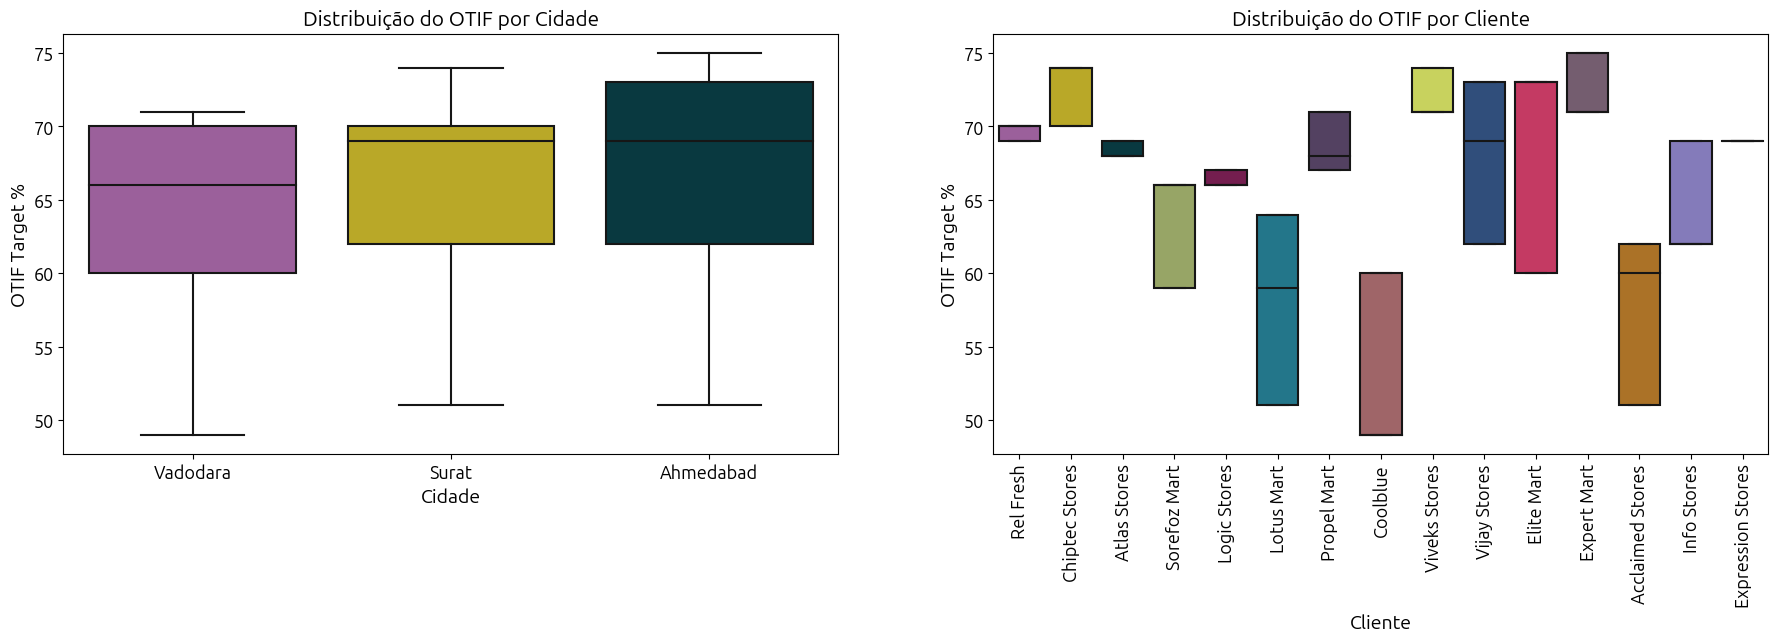

In [23]:
plt.subplot (2, 2, 1);
sns.boxplot (x = 'city', y = 'otif_target%', data = df_full);
plt.xlabel('Cidade');
plt.ylabel('OTIF Target %');
plt.title('Distribuição do OTIF por Cidade');

plt.subplot(2, 2, 2);
sns.boxplot (x = 'customer_name', y = 'otif_target%', data = df_full);
plt.xlabel('Cliente');
plt.ylabel('OTIF Target %');
plt.title('Distribuição do OTIF por Cliente');
plt.xticks(rotation=90);

##### Distribuição OTIF% Cidade

Conforme observado no gráfico acima, em relação à cidade de Surat, os dados revelam que o valor mínimo é aproximadamente 51, a mediana é 69 e o máximo é 74, indicando o melhor desempenho. Por outro lado, a cidade de Vadodara registrou as as taxas mais baixas de entrega dentro do prazo e completa, com um valor mínimo de aproximandamente 49, mediana de 66 e máximo de 71, demonstrando o pior desempenho.

Essa alta concentração de valores acima da mediana sugere que a cidade de Surat está atingindo altas taxas de entrega dentro do prazo e completa, enquanto Vadodara enfrenta desafios para alcançar o mesmo nível de desempenho. 

Entretanto, dado o entendimento da importância para uma empresa em entregar os pedidos aos clientes de forma pontual e completa, uma taxa de 74% (o registro mais alto) pode ser considerada baixa. Nesse sentido, é possível que a empresa busque estratégias para alcançar resultados ainda melhores.

##### Distribuição OTIF% Clientes

A distribuição da porcentagem da meta OTIF revela que as melhores taxas foram estabelecidas para entregas para as empresas Chipter Stores, Viveks Stores e Expert Mart, todas com valores mínimos de aproximadamente 70%.

Quanto às piores taxas, é possível notar que as empresas Lotus Mart, Coolblue e Acclaimed Stores tiveram metas estabelecidas que nem alcançaram os 65% da porcentagem da meta OTIF.

# 2.0. Save Final Dataset

In [22]:
df_service_level = df_full.copy()
df_service_level.to_csv('../dataset/service_level.csv', index=False)